# ML Basics Lab 1
Author: Dmytro Ivanenko, DA-12

### 1. Importing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

### 2. Define file names

In [2]:
train_filename = "lab_1_train.csv"
test_filename = "lab_1_test.csv"

### 3. EDA: What data looks like

In [3]:
with open(train_filename, 'r') as train_file:
    reader = csv.reader(train_file)
    i = 0
    next(reader)
    while(i < 10):
        line = next(reader)
        print("\t".join(line))
        i+=1

0	0.0	20.14901424590337
1	0.010101010101010102	19.978722729850666
2	0.020202020202020204	20.234710601834248
3	0.030303030303030304	20.51751501752847
4	0.04040404040404041	20.010562068391078
5	0.05050505050505051	20.030769013925347
6	0.06060606060606061	20.59497596586434
7	0.07070707070707072	20.371644560160014
8	0.08080808080808081	20.020773845835677
9	0.09090909090909091	20.344586194893974


### 4. Create function for splitting features and targets

In [4]:
def xy_split(path: str):
    data = np.loadtxt(path, delimiter=',', skiprows=1)
    x = data[:, 1]
    y = data[:, 2]
    return x, y

### 5. Training data visualization

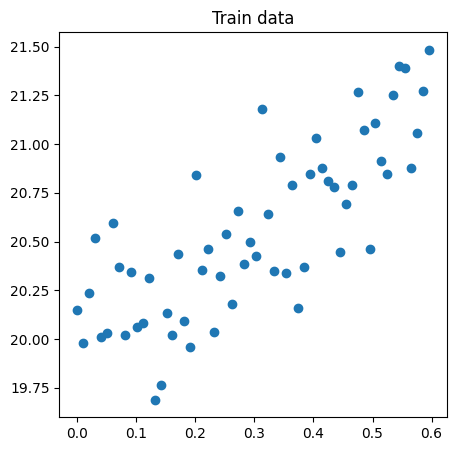

In [5]:
x_train, y_train = xy_split(train_filename)
x_test, y_test = xy_split(test_filename)
plt.figure(figsize=(5, 5))
plt.title("Train data")
plt.plot(x_train, y_train, 'o')
plt.show()

We can see that data is pretty linear, hence we can fit it into the linear regression and it will be optimal enough

### 6. Defining functions for MSE, prediction calculations and Linear Regression using batch gradient descent

In [6]:
def mse(targets: np.ndarray, predicts: np.ndarray):
    return np.mean((predicts - targets) ** 2)

def f(x, w):
    return w[0] + x * w[1]

def linear_regression(x_train, y_train, alpha=0.1, epsilon=1e-6, max_iter=10000):
    i = 0
    
    w = np.random.normal(0, 1, 2)
    J = mse(y_train, f(x_train, w))
    while True:
        i+=1
        y_pred = f(x_train, w)
        grad = np.array([(y_pred - y_train).mean(),
                         ((y_pred - y_train) * x_train).mean()])
        w -= alpha * grad
        
        e = mse(y_train, f(x_train, w))
        print("Epoch {:3}\tt0={:3.3}\t\tt1={:3.3}\t\tMSE={:.3}".format(i, w[0], w[1], e))
        
        if abs(J-e) <= epsilon:
            return w
        J = e
        
        if i == max_iter:
            return w

### 7. Calculating weights

In [7]:
w = linear_regression(x_train, y_train)

Epoch   1	t0=3.37		t1=2.43		MSE=2.71e+02
Epoch   2	t0=5.02		t1=2.92		MSE=2.15e+02
Epoch   3	t0=6.48		t1=3.35		MSE=1.71e+02
Epoch   4	t0=7.79		t1=3.74		MSE=1.36e+02
Epoch   5	t0=8.95		t1=4.08		MSE=1.08e+02
Epoch   6	t0=9.99		t1=4.38		MSE=85.9
Epoch   7	t0=10.9		t1=4.65		MSE=68.3
Epoch   8	t0=11.7		t1=4.89		MSE=54.4
Epoch   9	t0=12.5		t1=5.1		MSE=43.3
Epoch  10	t0=13.1		t1=5.28		MSE=34.5
Epoch  11	t0=13.7		t1=5.45		MSE=27.6
Epoch  12	t0=14.2		t1=5.59		MSE=22.1
Epoch  13	t0=14.7		t1=5.72		MSE=17.7
Epoch  14	t0=15.1		t1=5.83		MSE=14.2
Epoch  15	t0=15.5		t1=5.93		MSE=11.4
Epoch  16	t0=15.8		t1=6.02		MSE=9.22
Epoch  17	t0=16.1		t1=6.09		MSE=7.48
Epoch  18	t0=16.4		t1=6.16		MSE=6.1
Epoch  19	t0=16.6		t1=6.22		MSE=5.0
Epoch  20	t0=16.8		t1=6.26		MSE=4.12
Epoch  21	t0=17.0		t1=6.31		MSE=3.43
Epoch  22	t0=17.2		t1=6.34		MSE=2.88
Epoch  23	t0=17.3		t1=6.37		MSE=2.44
Epoch  24	t0=17.5		t1=6.4		MSE=2.09
Epoch  25	t0=17.6		t1=6.42		MSE=1.81
Epoch  26	t0=17.7		t1=6.44		MSE=1.59
Epoch  27	t0=17.8		t1=

Epoch 810	t0=19.8		t1=2.5		MSE=0.0814
Epoch 811	t0=19.8		t1=2.5		MSE=0.0814
Epoch 812	t0=19.8		t1=2.5		MSE=0.0813
Epoch 813	t0=19.8		t1=2.5		MSE=0.0813
Epoch 814	t0=19.8		t1=2.5		MSE=0.0812
Epoch 815	t0=19.8		t1=2.49		MSE=0.0812
Epoch 816	t0=19.8		t1=2.49		MSE=0.0811
Epoch 817	t0=19.8		t1=2.49		MSE=0.0811
Epoch 818	t0=19.8		t1=2.49		MSE=0.081
Epoch 819	t0=19.8		t1=2.49		MSE=0.081
Epoch 820	t0=19.8		t1=2.49		MSE=0.0809
Epoch 821	t0=19.8		t1=2.49		MSE=0.0809
Epoch 822	t0=19.8		t1=2.48		MSE=0.0809
Epoch 823	t0=19.8		t1=2.48		MSE=0.0808
Epoch 824	t0=19.8		t1=2.48		MSE=0.0808
Epoch 825	t0=19.8		t1=2.48		MSE=0.0807
Epoch 826	t0=19.8		t1=2.48		MSE=0.0807
Epoch 827	t0=19.8		t1=2.48		MSE=0.0806
Epoch 828	t0=19.8		t1=2.48		MSE=0.0806
Epoch 829	t0=19.8		t1=2.47		MSE=0.0806
Epoch 830	t0=19.8		t1=2.47		MSE=0.0805
Epoch 831	t0=19.8		t1=2.47		MSE=0.0805
Epoch 832	t0=19.8		t1=2.47		MSE=0.0804
Epoch 833	t0=19.8		t1=2.47		MSE=0.0804
Epoch 834	t0=19.8		t1=2.47		MSE=0.0803
Epoch 835	t0=19.8		t1=2.47		MSE=

### 8. Calculating MSE on test dataset using obtained weights 

In [8]:
test_mse = mse(f(x_test, w), y_test)
print("Test MSE: {:.3}".format(test_mse))

Test MSE: 0.0736


### 9. Visualizing full dataset with regression line

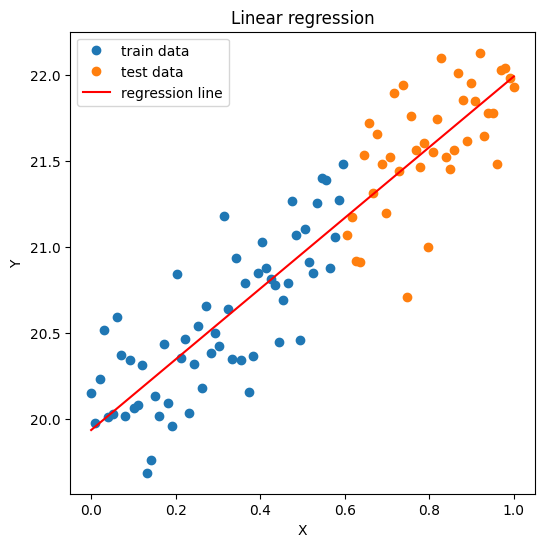

In [9]:
X_vals = np.linspace(min(x_train.min(), x_test.min()), 
                     max(x_train.max(), x_test.max()), 100)

plt.figure(figsize=(6, 6))
plt.title("Linear regression")
plt.plot(x_train, y_train, 'o', label='train data')
plt.plot(x_test, y_test, 'o', label='test data')
plt.plot(X_vals, f(X_vals, w), label='regression line', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()